# Fraud Detection with Logistic Regression
Jonathan Cox<br>
WGU C964: Computer Science Capstone<br>
Student ID 011137947

This notebook contains:
<ul>
    <li>A machine learning model that categorizes transactions as fraudulent or non-fraudulent</li>
    <li>A user interface to set transaction parameters and obtain a categorization</li>
    <li>Accuracy analysis of the model</li>
    <li>Data Visualizations</li>
</ul>


## Machine Learning Model
The code below imports and prepares raw data to be used in the machine learning model.

In [36]:
# Create and train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import data.transform_data as td
import pandas as pd

transaction_data = td.import_from_csv()
'''all_columns = ['client_id', 'transaction_id', 'timestamp', 'transaction_amount',
       'merchant_type', 'transaction_type', 'currency', 'city',
       'email_address', 'Fraud_Label', 'credit_limit',
       'avg_transaction_amount', 'transaction_average_ratio',
       'merchant_type_Clothing', 'merchant_type_Electronics',
       'merchant_type_Entertainment', 'merchant_type_Gas Station',
       'merchant_type_Grocery', 'merchant_type_Health',
       'merchant_type_Online Retail', 'merchant_type_Online Stores',
       'merchant_type_Restaurant', 'merchant_type_Utilities',
       'transaction_type_Digital Wallet', 'transaction_type_Online',
       'transaction_type_POS', 'currency_CDN', 'currency_EURO', 'currency_JPN',
       'currency_RMB', 'currency_USD', 'city_Calgary', 'city_Toronto',
       'city_Vancouver']'''

# Dependend variable
y = transaction_data['Fraud_Label']

# Independend variables
parameters = [
    'transaction_amount',
    'avg_transaction_amount',
    'credit_limit',
    'merchant_type_Clothing', 
    'merchant_type_Electronics', 
    'merchant_type_Entertainment', 
    'merchant_type_Gas Station', 
    'merchant_type_Grocery', 
    'merchant_type_Health', 
    'merchant_type_Online Retail', 
    'merchant_type_Online Stores', 
    'merchant_type_Restaurant', 
    'merchant_type_Utilities',
    'transaction_type_Digital Wallet', 
    'transaction_type_Online', 
    'transaction_type_POS', 
    'currency_CDN', 
    'currency_EURO', 
    'currency_JPN', 
    'currency_RMB', 
    'currency_USD',
    'city_Calgary', 
    'city_Toronto',
    'city_Vancouver'
    ]
X = transaction_data[parameters]

# Split X, y into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify=y, random_state=7)

# Create the model
# Try class_weight = 'balanced' to account for unbalanced dataset https://medium.com/@data.science.enthusiast/how-to-improve-logistic-regression-in-imbalanced-data-with-class-weights-1693719136aa
logistic_regression_model = LogisticRegression(random_state=10, max_iter=100000, class_weight='balanced')
logistic_regression_model.fit(X_train.values, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,10
,solver,'lbfgs'
,max_iter,100000
,multi_class,'deprecated'


## User Interface
The code below creates a user interface and makes a prediction (fraudulent or non-fraudulent) based on user input.

In [37]:
# Function for ipywidgets.interact method to call with slider input
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
def prediction_from_input(transaction_amount: float, 
                          avg_transaction_amount: float,
                          credit_limit: float,
                          merchant_type: str,
                          transaction_type: str,
                          currency: str,
                          city: str
                         ):
    # Dictionary representing merchant_type value. Set value to 1 where key = function parameter (merchant_type) 
    merchant_type_flags = {
        'Online Retail': 0,
        'Restaurant': 0, 
        'Grocery': 0, 
        'Electronics': 0, 
        'Clothing': 0,
        'Gas Station': 0, 
        'Online Stores': 0, 
        'Health': 0, 
        'Utilities': 0, 
        'Entertainment': 0
    }
    merchant_type_flags[merchant_type] = 1
    
    transaction_type_flags = {
        'Online': 0, 
        'Digital Wallet': 0, 
        'POS': 0
    }
    transaction_type_flags[transaction_type] = 1
    
    currency_flags = {
        'USD': 0, 
        'CDN': 0,
        'RMB': 0,
        'EURO': 0,
        'JPN': 0
    }                     
    currency_flags[currency] = 1

    city_flags = {
        'Calgary': 0, 
        'Toronto': 0,
        'Vancouver': 0,
    }                     
    city_flags[city] = 1
                             
    prediction = int(logistic_regression_model.predict([[
       transaction_amount, 
       avg_transaction_amount,
       credit_limit, 
       merchant_type_flags['Online Retail'], # includes value for each of the one hot coded parameters using dictionaries from above
       merchant_type_flags['Restaurant'],
       merchant_type_flags['Grocery'],
       merchant_type_flags['Electronics'],
       merchant_type_flags['Clothing'],
       merchant_type_flags['Gas Station'],
       merchant_type_flags['Online Stores'],
       merchant_type_flags['Health'],
       merchant_type_flags['Utilities'],
       merchant_type_flags['Entertainment'],
       transaction_type_flags['Online'],
       transaction_type_flags['Digital Wallet'],
       transaction_type_flags['POS'],
       currency_flags['USD'],
       currency_flags['CDN'],
       currency_flags['RMB'],
       currency_flags['EURO'],
       currency_flags['JPN'],
       city_flags['Calgary'],
       city_flags['Toronto'],
       city_flags['Vancouver']
    ]])[0])
    return "Fraud" if prediction == 1 else "Not Fraud"

In [38]:
# Create user interface -- sliders and dropdowns
import ipywidgets as w
transaction_amount_slider = w.FloatSlider(
    value = 1500,
    min = 0,
    max = 5000,
    step = 1,
    description = "Transaction Amount",
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    style = {'description_width':'auto'},
    layout = {'width': 'auto'}
)

avg_transaction_amount_slider = w.FloatSlider(
    value = 1500,
    min = 0,
    max = 5000,
    step = 1,
    description = "Average Transaction Amount",
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    style = {'description_width':'auto'},
    layout = {'width': 'auto'}
)

credit_limit_slider = w.FloatSlider(
    value = 3500,
    min = 1000,
    max = 8500,
    step = 1,
    description = "Credit Limit",
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    style = {'description_width':'auto'},
    layout = {'width': 'auto'}
)

merchant_type_dropdown = w.Dropdown(
    options = ['Online Retail', 'Restaurant', 'Grocery', 'Electronics', 'Clothing',
 'Gas Station', 'Online Stores', 'Health', 'Utilities', 'Entertainment'],
    value = 'Utilities',
    description = 'Merchant Type',
    disabled = False,
    style = {'description_width':'auto'},
    continuous_update = False
)

transaction_type_dropdown = w.Dropdown(
    options = ['Online', 'Digital Wallet', 'POS'],
    value = 'Online',
    description = 'Transaction Type',
    disabled = False,
    style = {'description_width':'auto'},
    continuous_update = False
)

currency_dropdown = w.Dropdown(
    options = ['USD', 'CDN', 'RMB', 'EURO', 'JPN'],
    value = 'USD',
    description = 'Currency',
    disabled = False,
    style = {'description_width':'auto'},
    continuous_update = False
)

city_dropdown = w.Dropdown(
    options = ['Calgary', 'Toronto', 'Vancouver'],
    value = 'Calgary',
    description = 'City',
    disabled = False,
    style = {'description_width':'auto'},
    continuous_update = False
)

In [39]:
# Return predicted categorization based on slider input
w.interact(prediction_from_input, 
           transaction_amount = transaction_amount_slider, 
           avg_transaction_amount = avg_transaction_amount_slider,
           credit_limit = credit_limit_slider, 
           merchant_type = merchant_type_dropdown,
           transaction_type = transaction_type_dropdown,
           currency = currency_dropdown,
           city = city_dropdown)

interactive(children=(FloatSlider(value=1500.0, continuous_update=False, description='Transaction Amount', lay…

<function __main__.prediction_from_input(transaction_amount: float, avg_transaction_amount: float, credit_limit: float, merchant_type: str, transaction_type: str, currency: str, city: str)>

## Accuracy Analysis
The model accuracy will be evaluated using the following metrics:
<ul>
    <li>Overall Accuracy Score = 0.630</li>
    <li>Precision = 0.978</li>
    <li>Recall = 0.022</li>
    <li>F1-score = 0.042</li>
</ul>

In [40]:
# Compute overall accuracy score
accuracy_count = 0
for position, y_t in enumerate(y_test):
    if y_t == int(y_predicted[position]):
        accuracy_count += 1
accuracy_count
overall_accuracy_score = accuracy_count / len(y_test)
overall_accuracy_score

0.6302666957343216

In [50]:
# Compute overall accuracy score, precision, recall, and F1-score
# https://www.geeksforgeeks.org/machine-learning/sklearn-classification-metrics/ 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
cm = confusion_matrix(y_test, y_predicted)
accuracy = accuracy_score(y_predicted, y_test)
precision = precision_score(y_predicted, y_test)
recall = recall_score(y_predicted, y_test)
f1 = f1_score(y_predicted, y_test)
cm, accuracy, precision, recall,f1

(array([[85608, 50854],
        [   25,  1123]]),
 0.6302666957343216,
 0.9782229965156795,
 0.02160571021798103,
 0.04227764705882353)

## Data Visualizations

The following visualizations describe the dataset that was used for training and testing this model (Synthetic Fraud Dataset_Medium by Jisong Xiao, https://www.kaggle.com/datasets/jisongxiao/synthetic-fraud-dataset-medium)

<strong>Correlation Matrix</strong><br>
This visualization shows the correlation between all of the numerical parameters in the dataset.

In [46]:
parameters = ['transaction_amount', 'Fraud_Label', 'credit_limit', 'avg_transaction_amount', 'transaction_average_ratio']
corr_matrix = transaction_data[parameters].corr()
corr_matrix

,transaction_amount,Fraud_Label,credit_limit,avg_transaction_amount,transaction_average_ratio
transaction_amount,1.000000,0.012212,0.266105,0.217956,0.739643
Fraud_Label,0.012212,1.000000,-0.016178,-0.012952,0.016230
credit_limit,0.266105,-0.016178,1.000000,0.793666,0.006257
avg_transaction_amount,0.217956,-0.012952,0.793666,1.000000,-0.086608
transaction_average_ratio,0.739643,0.016230,0.006257,-0.086608,1.000000


<strong>Fraud Rate by Month</strong><br>
The graph below shows what percent of transactions were fraudulent each month.

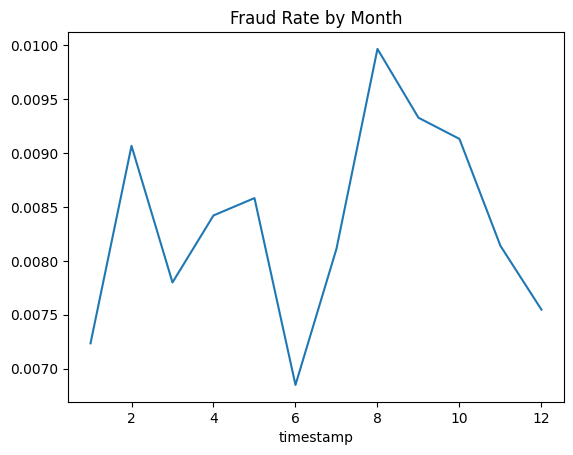

In [47]:
import matplotlib.pyplot as plt
fraud_transactions = transaction_data[transaction_data['Fraud_Label'] == 1]
fraud_count_by_month = fraud_transactions.groupby(fraud_transactions['timestamp'].dt.month)['Fraud_Label'].sum() # https://www.statology.org/pandas-group-by-month/
transaction_count_by_month = transaction_data.groupby(transaction_data['timestamp'].dt.month)['timestamp'].count()
percent_fraud_by_month = fraud_count_by_month / transaction_count_by_month
percent_fraud_by_month.plot(x = 'timestamp', title="Fraud Rate by Month")
plt.show()


<strong>Fraud Rate by Categorical Parameters</strong>
<br>
The widgets below show fraud rate by:
<ul>
    <li>Merchant type</li>
    <li>Transaction type</li>
    <li>Currench</li>
    <li>City</li>
</ul>

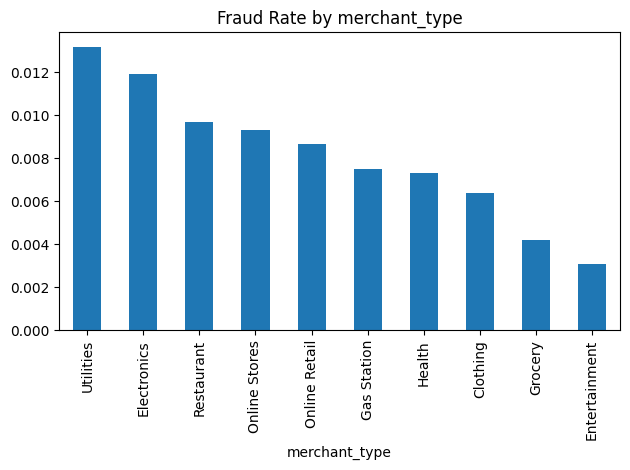

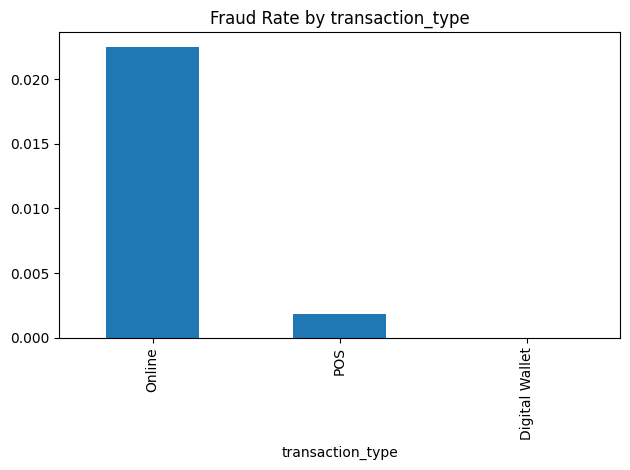

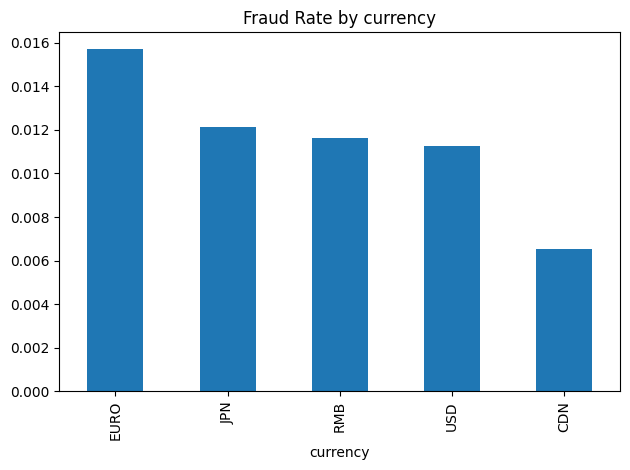

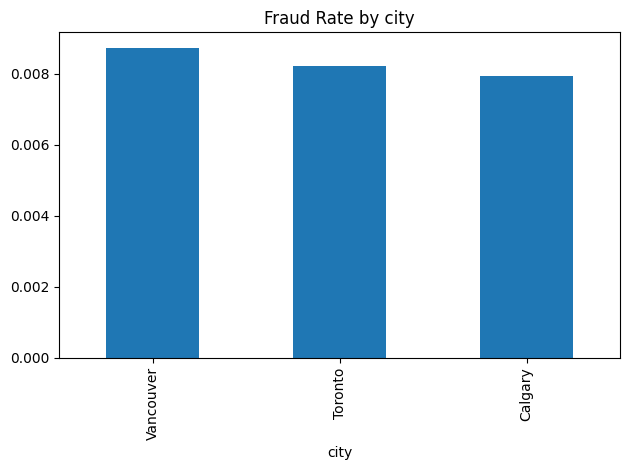

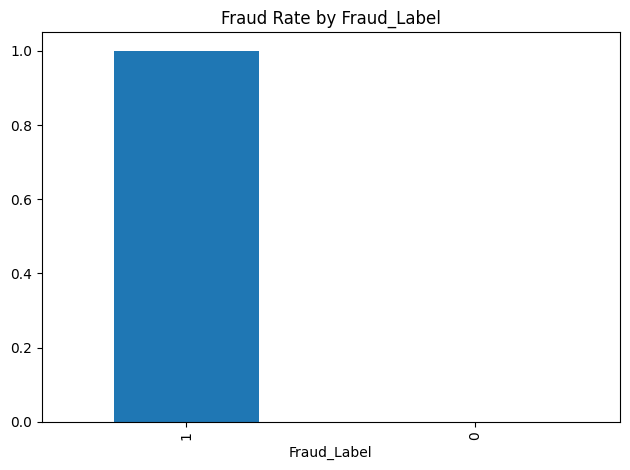

In [48]:
def fraud_rate_bar_graph(category: str):
    fraud_count_by_category = fraud_transactions.groupby(fraud_transactions[f'{category}'])['Fraud_Label'].sum()
    transaction_count_by_category = transaction_data.groupby(f'{category}')['transaction_id'].count()
    percent_fraud_by_category = fraud_count_by_category / transaction_count_by_category
    percent_fraud_by_category.sort_values(ascending=False, inplace=True)
    percent_fraud_by_category.plot(x=f'{category}', kind='bar', title=f'Fraud Rate by {category}')    
    plt.tight_layout()
    plt.show()
for x in ['merchant_type', 'transaction_type', 'currency', 'city', 'Fraud_Label']:
    fraud_rate_bar_graph(x)
